In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import string
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure inline plots
%matplotlib inline

from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5080 non-null   int64 
 1   keyword   5080 non-null   object
 2   location  5080 non-null   object
 3   text      5080 non-null   object
 4   target    5080 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 238.1+ KB


## Target Distribution

<Axes: xlabel='target', ylabel='count'>

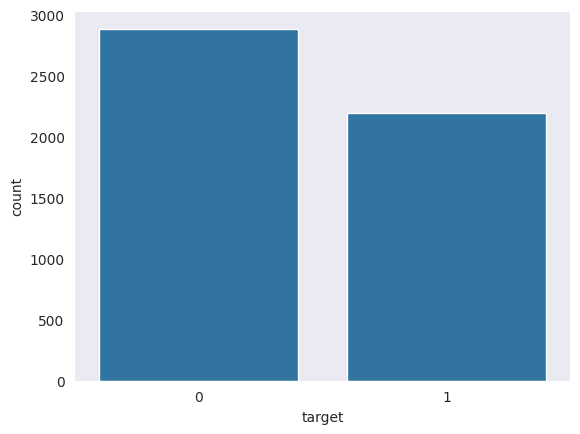

In [9]:
sns.set_style("dark")
sns.countplot(x=df['target'])

In [10]:
# craeteing new column for storing length of reviews
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76


<Axes: ylabel='Frequency'>

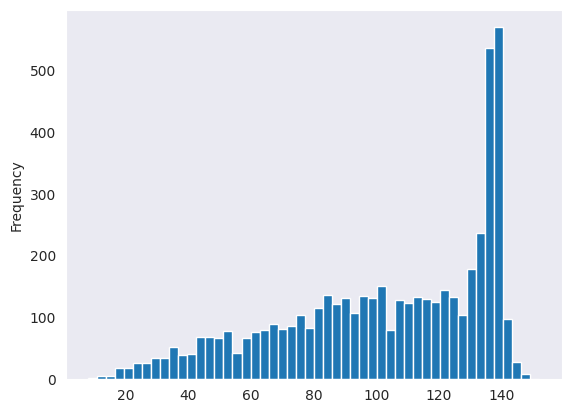

In [11]:
df['length'].plot(bins=50, kind='hist')

In [12]:
df.length.describe()

,length
count,5080.000000
mean,102.319882
std,33.405894
min,8.000000
25%,79.000000
50%,109.000000
75%,134.000000
max,152.000000


In [15]:
filtered_df = df[df['length'] == 157]

if not filtered_df.empty:
    print(filtered_df['text'].iloc[0])  # Access first matching row safely
else:
    print("No tweets found with length 157.")


No tweets found with length 157.


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

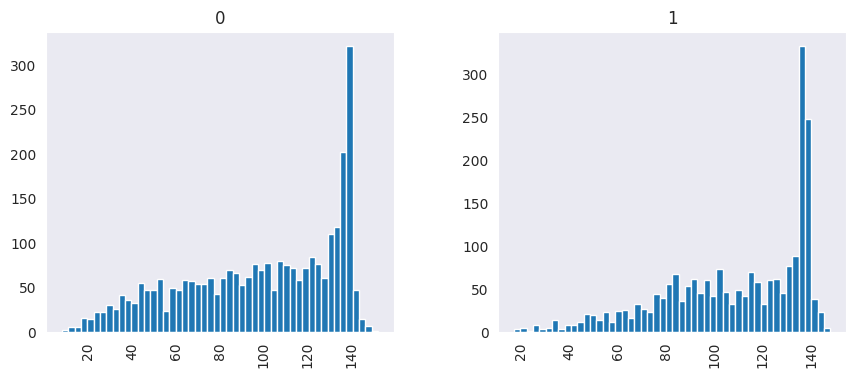

In [16]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

In [18]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)


df.loc[df['target'] == 1, 'text'] = df.loc[df['target'] == 1, 'text'].apply(remove_stopwords)
df.loc[df['target'] == 0, 'text'] = df.loc[df['target'] == 0, 'text'].apply(remove_stopwords)

## Plotting wordcloud of Disaster Tweets

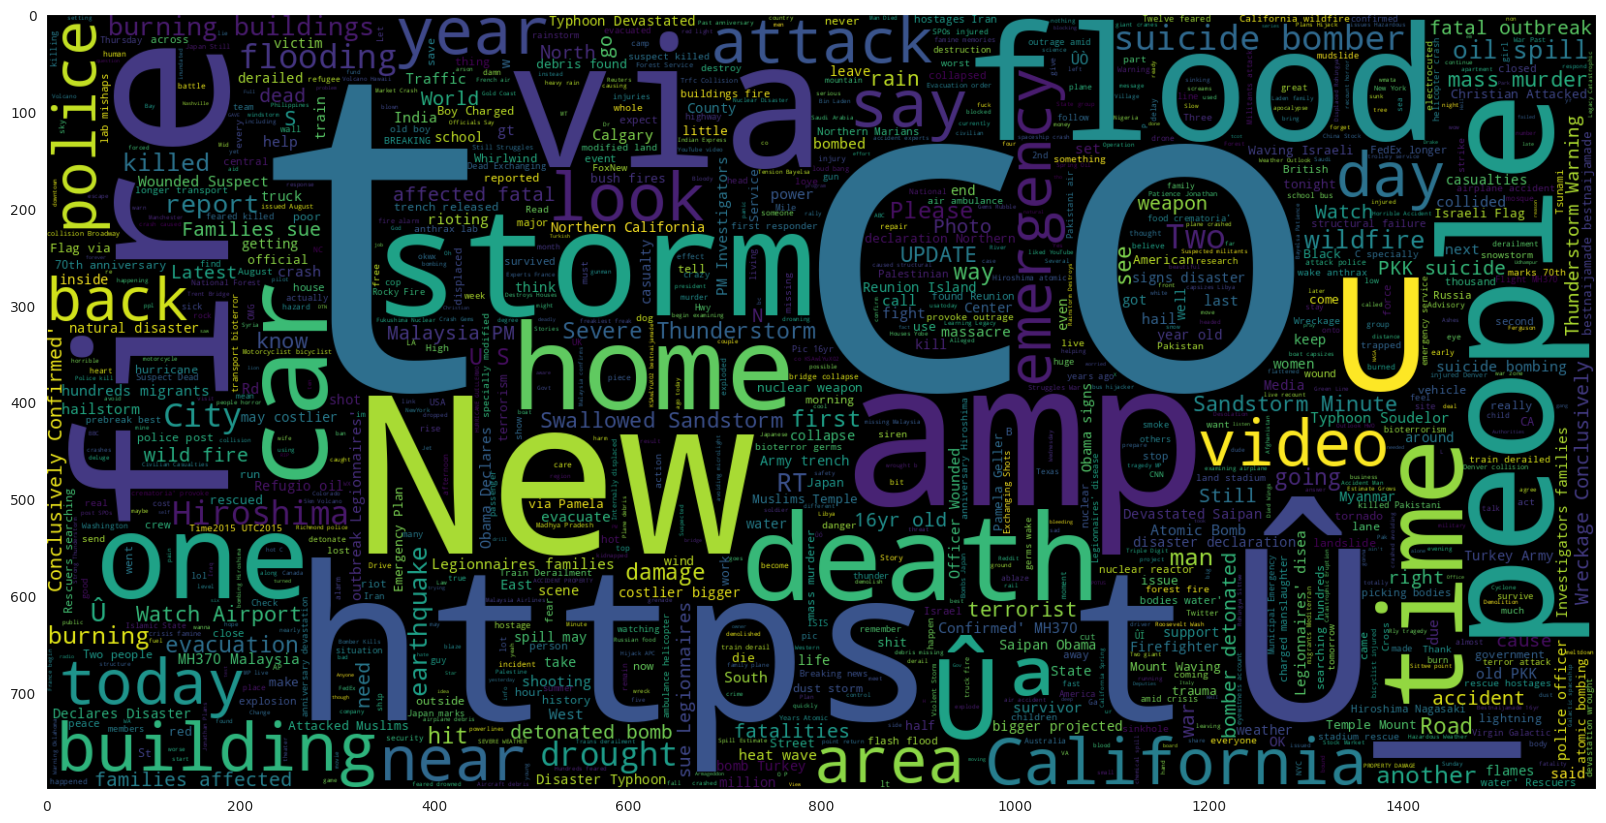

In [19]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')


## Plotting wordcloud of Normal Tweets

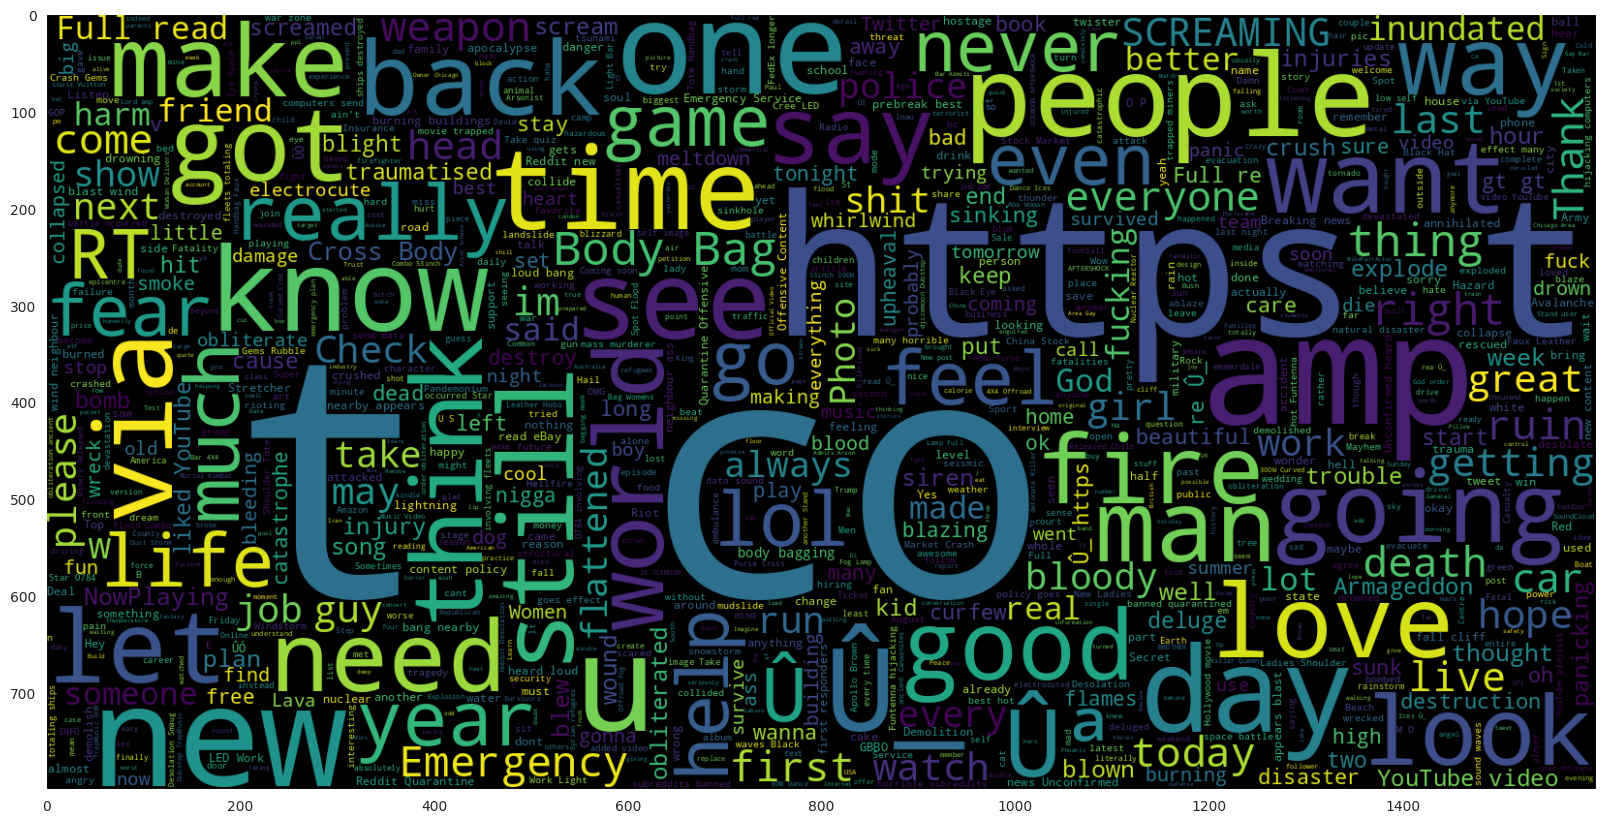

In [20]:
plt.figure(figsize = (20,20)) # Text that is Normal Tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

## Data Cleaning and Preparation

In [21]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanTweet(txt):
  # lowercaing
    txt = txt.lower()
    # tokenization
    words = nltk.word_tokenize(txt)
  # removing stopwords & mennatizing the words
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',text)
    return txt


## Applying Clean Tweet Function on Tweets Text

In [25]:
import nltk
nltk.download('punkt_tab')  # Ensure the tokenizer is available

df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,id,keyword,location,text,target,length,cleaned_tweets
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,bbcmtd wholesale market ablaze http t co...
32,49,ablaze,Est. September 2012 - Bristol,always try bring heavy. #metal #RT http://t.co...,0,67,always try bring heavy metal rt http ...
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,africanbaze breaking news nigeria flag s...
34,52,ablaze,"Philadelphia, PA",Crying more! Set ablaze,0,34,cry set ablaze
35,53,ablaze,"London, UK",plus side LOOK SKY LAST NIGHT ABLAZE http://t....,0,76,plus side look sky last night ablaze http ...


## Creating Feature & Target Variables

In [31]:
y = df['target']  # Define target variable correctly
X = df['cleaned_tweets']  # Define feature variable correctly


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

## TF-IDF Vectorizer - Bi-Gram

In [33]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Multinomial Naive Bayes

In [34]:
## Model Fitting
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)



MultinomialNB()

## 10-Fold Cross Validation

In [37]:
from sklearn.model_selection import KFold, cross_val_score  #Import cross_val_score

kfold = KFold(n_splits=10)  #KFold is used correctly
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator=mnb_tf, X=tfidf_train_2, y=y_train, cv=kfold, scoring=scoring)
acc_mnb2.mean()  #Compute mean accuracy score


0.7851992834751457

## Model Prediction Test set

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.786417,0.840491,0.624146,0.909879,0.71634


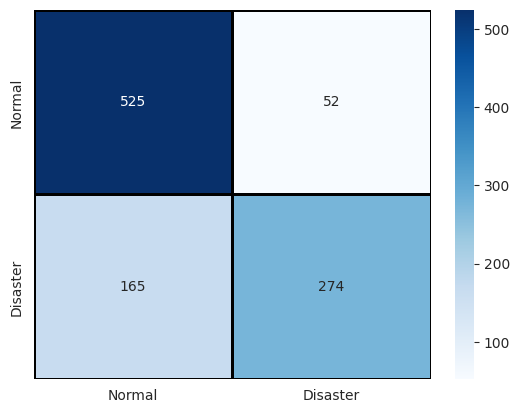

In [38]:
pred_mnb2 = mnb_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)


model_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

## Passive Aggressive Classifier

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier  # Import the missing class

# Initialize the model
pass_tf = PassiveAggressiveClassifier()

# Train the model
pass_tf.fit(tfidf_train_2, y_train)


PassiveAggressiveClassifier()

## 10-Fold Cross Validation

In [41]:

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass2 = cross_val_score(estimator = pass_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_pass2.mean()

0.787658101451205

## Model Prediction

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.786417,0.840491,0.624146,0.909879,0.716340
1,Passive Aggressive Classifier - TFIDF-Bigram,0.767717,0.723077,0.749431,0.781629,0.736018


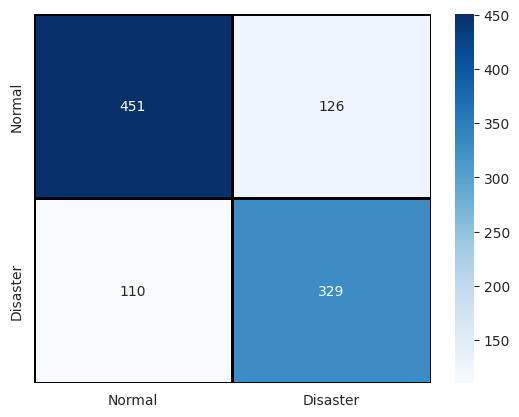

In [44]:
# Compute Confusion Matrix and plot Heatmap
CM = confusion_matrix(y_test, pred_pass2)
sns.heatmap(CM, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['Normal', 'Disaster'], yticklabels=['Normal', 'Disaster'])

# Compute Evaluation Metrics
acc = accuracy_score(y_test, pred_pass2)
prec = precision_score(y_test, pred_pass2)
rec = recall_score(y_test, pred_pass2)
f1 = f1_score(y_test, pred_pass2)

# Specificity Calculation (not originally defined in the provided code)
tn, fp, fn, tp = CM.ravel()  # Extract True Negatives, False Positives, etc.
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Create DataFrame for results
results = pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Bigram', acc, prec, rec, specificity, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])

# Ensure `model_results` exists (initialize it if necessary)
if 'model_results' not in locals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])

# Use `pd.concat()` instead of `.append()`
model_results = pd.concat([model_results, results], ignore_index=True)

# Display final results
model_results

## TF-IDF Vectorizer - Tri Gram

In [45]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

## Multinomial Naive Bayes - Tri Gram

In [46]:
mnb_tf3 = MultinomialNB()
mnb_tf3.fit(tfidf_train_3, y_train)

MultinomialNB()

## 10-fold cross validation

In [47]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb3 = cross_val_score(estimator = mnb_tf, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_mnb3.mean()

0.7765906972803525

## Model Prediction

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Passive Aggressive Classifier - TFIDF-Bigram,0.767717,0.723077,0.749431,0.781629,0.736018
1,Multinomial Naive Bayes - TFIDF-Trigram,0.785433,0.853035,0.608200,0.920277,0.710106


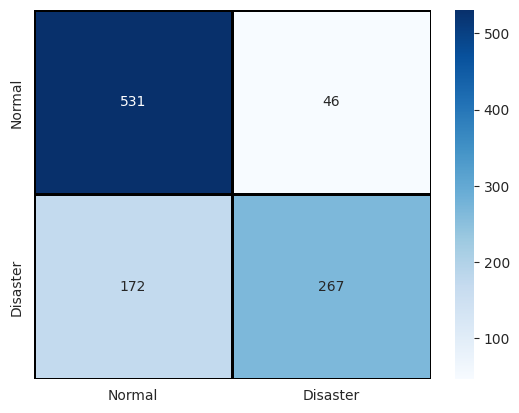

In [49]:

# Generate predictions
pred_mnb3 = mnb_tf3.predict(tfidf_test_3)

# Compute Confusion Matrix and plot Heatmap
CM = confusion_matrix(y_test, pred_mnb3)
sns.heatmap(CM, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['Normal', 'Disaster'], yticklabels=['Normal', 'Disaster'])

# Compute Evaluation Metrics
acc = accuracy_score(y_test, pred_mnb3)
prec = precision_score(y_test, pred_mnb3)
rec = recall_score(y_test, pred_mnb3)
f1 = f1_score(y_test, pred_mnb3)

# Specificity Calculation (if not defined)
tn, fp, fn, tp = CM.ravel()  # Extract True Negatives, False Positives, etc.
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Create DataFrame for model results
mod_results = pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Trigram', acc, prec, rec, specificity, f1]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])

# Ensure `results` exists (initialize it if necessary)
if 'results' not in locals():
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])

# Use `pd.concat()` instead of `.append()`
results = pd.concat([results, mod_results], ignore_index=True)

# Display updated results
results


## Passive Aggressive Classifier - Tri Gram

In [50]:
pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)

## cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass3 = cross_val_score(estimator = pass_tf3, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_pass3.mean()

0.7901199452923592

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Passive Aggressive Classifier - TFIDF-Bigram,0.767717,0.723077,0.749431,0.781629,0.736018
1,Multinomial Naive Bayes - TFIDF-Trigram,0.785433,0.853035,0.608200,0.920277,0.710106
2,Passive Aggressive Classifier - TFIDF-Trigram,0.761811,0.711828,0.753986,0.767764,0.732301


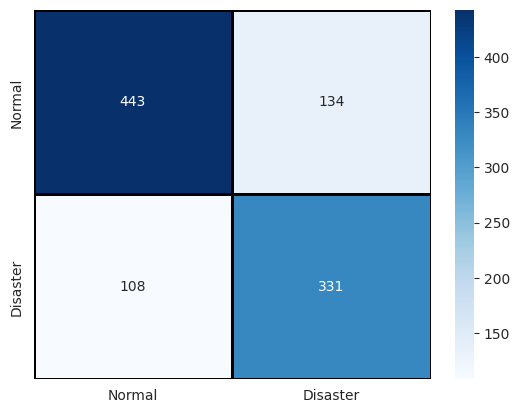

In [52]:

# Generate predictions
pred_pass3 = pass_tf3.predict(tfidf_test_3)

# Compute Confusion Matrix and plot Heatmap
CM = confusion_matrix(y_test, pred_pass3)
sns.heatmap(CM, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['Normal', 'Disaster'], yticklabels=['Normal', 'Disaster'])

# Compute Evaluation Metrics
acc = accuracy_score(y_test, pred_pass3)
prec = precision_score(y_test, pred_pass3)
rec = recall_score(y_test, pred_pass3)
f1 = f1_score(y_test, pred_pass3)

# Specificity Calculation (if not defined earlier)
tn, fp, fn, tp = CM.ravel()  # Extract True Negatives, False Positives, etc.
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Create DataFrame for model results
mod1_results = pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Trigram', acc, prec, rec, specificity, f1]],
                            columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])

# Ensure `results` exists (initialize it if necessary)
if 'results' not in locals():
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])

# Use `pd.concat()` instead of `.append()`
results = pd.concat([results, mod1_results], ignore_index=True)

# Display updated results
results


## Most Informative Features

In [53]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472

    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [55]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3, pass_tf3, n=10)

0 -2.0665602769738913 new
0 -1.803806827853783 love
0 -1.8019013233471943 let
0 -1.7741464077699554 blew
0 -1.7648429198161044 nowplaying
0 -1.6955682869146602 suicide bomb
0 -1.6341848118831104 ruin
0 -1.5954787983574108 screaming
0 -1.5412663079877948 matako
0 -1.5142179969592442 bag

1 3.48577753651018 http
1 3.3637282919195877 california
1 3.266304031820167 hiroshima
1 2.762949505799764 train
1 2.5716418215356 flood
1 2.4926085169448906 bombing
1 2.462293606851659 near
1 2.4431153352429704 temecafreeman gm pray
1 2.4431153352429704 temecafreeman gm
1 2.4431153352429704 temecafreeman


In [ ]:
most_informative_feature_for_binary_classification(tfidf_vectorizer, mnb_tf, n=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


0 -11.180922536489286 aa mgm
0 -11.180922536489286 aaaa
0 -11.180922536489286 aaaa ok
0 -11.180922536489286 aamir
0 -11.180922536489286 aamir javaid
0 -11.180922536489286 aannnnd
0 -11.180922536489286 aannnnd reddit
0 -11.180922536489286 aar
0 -11.180922536489286 aar ambulance
0 -11.180922536489286 aatt

1 -6.6560498687234295 http
1 -8.387208121290184 news
1 -8.464684612463378 california
1 -8.492627951161609 family
1 -8.535487626988232 disaster
1 -8.549722346224069 suicide
1 -8.611859274565505 train
1 -8.629174350014052 building
1 -8.636480964167959 home
1 -8.648206604075396 hiroshima


## Sample prediction

In [56]:
sentences = [
  "Just happened a terrible car crash",
    "Heard about #earthquake is different cities, stay safe everyone.",
    "No I don't like cold!",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]

tfidf_trigram = tfidf_vectorizer_3.transform(sentences)


predictions = pass_tf3.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("text:", text, "\nClass:", target)
        print()
    else:
        target="Normal Tweet"
        print("text:", text, "\nClass:", target)
        print()

text: Just happened a terrible car crash 
Class: Disaster Tweet

text: Heard about #earthquake is different cities, stay safe everyone. 
Class: Normal Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet



In [57]:
test_df = pd.read_csv("/content/test.csv")
# Make predictions on the test dataset
test_df['predicted_target'] = model.predict(X_test)

test_df['cleaned_text'] = test_df['text'].fillna('').apply(clean_text)

# Save predictions to a new CSV file
output_file = "test_predictions_from_model.csv"
test_df[['id', 'predicted_target']].to_csv(output_file, index=False)

print(f"Predictions saved successfully in {output_file}")

NameError: name 'model' is not defined